In [7]:
import pandas as pd
returnsant=pd.read_csv("returnsant.csv").drop('perf_date',axis=1)

In [8]:
returnsant=returnsant.drop('Factor - Crowding',axis=1)

In [3]:
import numpy as np 
from random import randrange
class myKmeans():

    def __init__(self,timeseries):
        self.timeseries=timeseries
    
        self.k=self.timeseries.shape[1]
    
    def generate_centroid(self):
        centroid=[]
        for i in range(0,self.k):
            cent=randrange(self.timeseries.shape[0])
            centroid.append(self.timeseries[cent,:])

        return np.array(centroid)

    def dist(self,cent):
        dist=[]
        for i in range(0,self.timeseries.shape[0]):
            #print(self.timeseries[i,:])
            #print(cent)
            dist.append(np.dot(np.ones(self.timeseries.shape[1]),np.abs(cent - self.timeseries[i,:])))
        return np.array(dist)

    def designate(self):
        compare=[]
        for i in range(0,self.k):
            compare.append(self.dist(self.generate_centroid()[i,:]))
        return np.array(compare)

    def decide(self):
        skrt=[]
        for i in range(0,self.timeseries.shape[0]):
            #print(self.designate().shape)
            cluster_idx=np.argsort(self.designate()[:,i])[0]
            skrt.append(cluster_idx)
        return skrt

    def newcentroid(self):
        decision=self.decide()
        #idx=[]
        newnewcent=[]
        frame=pd.DataFrame(self.timeseries)
        frame['results']=decision
        yurt=np.zeros((self.timeseries.shape[0],self.timeseries.shape[1],self.timeseries.shape[1]))
        clusters = np.unique(decision)
        #print(decision)
        #newcent=np.zeros((self.timeseries.shape[1],self.timeseries.shape[1]))
        #print(clusters)
        #bluster=[]
        for e in range(0,self.timeseries.shape[0]):
        
            
            for i in (clusters):
                #print(i)
                if i==frame['results'].iloc[e]:
                    #print(self.timeseries[e,:])
                    #print(self.timeseries[e,:])
                    yurt[e,:,i]=(self.timeseries[e,:])
            #print(yurt[:,:,i])
                # how to remove all the zeros from the cluster list and then take the mean of each column
                ## the new cent is the mean of that given cluster list         
                
        
        #print(yurt)
        for i in clusters:
            newcent=[]
            curcluster= yurt[:,:,i]
            curcluster=pd.DataFrame(curcluster)
            curcluster= curcluster.loc[~(curcluster==0).all(axis=1)]
            #print(curcluster)
                ## https://stackoverflow.com/questions/52243734/removing-all-zeros-from-an-array
            #zero_rows = (curcluster == 0).all(1)    
            #first_invalid = np.where(zero_rows)[0][0]
            #curcluster=curcluster[:first_invalid]
           
            if len(curcluster) == 0: 
                pass
            else:
                #print(curcluster.shape)
                for e in range(0,curcluster.shape[1]):
                    newcent.append(np.mean(curcluster.iloc[:,e].values))
                    #print(newcent)
            newnewcent.append(newcent)
            #print(curcluster)
            
            #rint(curcluster.shape)
            #print(curcluster)
            
            #nozeros=np.array(nozeros)
            #newcent=[]
            #nozeros=np.array(nozeros)
        #yurt=yurt[yurt != 0]
        #return yurt
        #return yurt
        #print(data)
        
        #for w in clusters:
         #   for e in range(0,self.timeseries.shape[0]):
        return np.array(newnewcent) 
        
      
    def fit(self,iterations):
        frame=pd.DataFrame(self.timeseries)
        newcent=self.newcentroid()
        for y in range(iterations):
            
            #dist=self.dist(newcent)
            compare=[]
            skrt=[]
            newnewcent=[]
            for i in range(0,self.k):
                #print(self.dist(newcent[i,:]))
                compare.append(self.dist(newcent[i,:]))
            compare=np.array(compare)
            for i in range(0,self.timeseries.shape[0]):
                #print((compare.shape))
                cluster_idx=np.argsort(compare[:,i])[0]
                skrt.append(cluster_idx)
            skrt=np.array(skrt)
            frame['results']=skrt
            yurt=np.zeros((self.timeseries.shape[0],self.timeseries.shape[1],self.timeseries.shape[1]))
            clusters = np.unique(skrt)
        #print(decision)
        #newcent=np.zeros((self.timeseries.shape[1],self.timeseries.shape[1]))
        #print(clusters)
        #bluster=[]
            
            for e in range(0,self.timeseries.shape[0]):
        
            
                for i in (clusters):
                #print(i)
                    if i==frame['results'].iloc[e]:
                    #print(self.timeseries[e,:])
                    #print(self.timeseries[e,:])
                        yurt[e,:,i]=(self.timeseries[e,:])
            #print(yurt[:,:,i])
                # how to remove all the zeros from the cluster list and then take the mean of each column
                ## the new cent is the mean of that given cluster list         
                
        
        #print(yurt)
            
            for i in clusters:
                newce=[]
                curcluster= yurt[:,:,i]
                curcluster=pd.DataFrame(curcluster)
                curcluster= curcluster.loc[~(curcluster==0).all(axis=1)]
            #print(curcluster)
                ## https://stackoverflow.com/questions/52243734/removing-all-zeros-from-an-array
            #zero_rows = (curcluster == 0).all(1)    
            #first_invalid = np.where(zero_rows)[0][0]
            #curcluster=curcluster[:first_invalid]
                #print(curcluster.shape)
                if len(curcluster) == 0 :
                    pass
                
                else:
                #print(curcluster.shape)
                    for e in range(0,curcluster.shape[1]):
                        newce.append(np.mean(curcluster.values[:,e]))
                    #print(newcent)
                
                newnewcent.append(newce)
            newcent=np.array(newnewcent)
        return skrt, newcent
            #print(newcent)
            
          #  compare.append(self.dist(newcent))
         
        # compare=np.array(compare)
       #  skrt=[]
       #  for i in range(0,iterations):
      #       cluster_idx=np.argsort(compare[:,i])[0]
    #         skrt.append(cluster_idx)
    #     return skrt

In [4]:
if __name__=='__main__':
    
    k=myKmeans(returnsant.values)

In [380]:
predict=k.newcentroid()

In [370]:
predict

array([[ 8.27500000e-03,  2.69567683e-03, -5.76282008e-03,
         8.93754925e-03,  2.14315317e-03,  6.81615783e-03,
        -2.43894742e-03,  9.23685358e-03,  3.55650675e-03,
        -4.90345833e-03,  8.06007367e-03,  1.08761187e-02,
         1.70075511e-02, -2.89829183e-03,  6.87031883e-03,
         4.94360600e-03,  1.80843430e-02,  3.83001283e-03],
       [ 2.32076923e-02,  9.14946385e-04,  4.53206038e-03,
         4.91567677e-03, -6.49546769e-03,  8.18120192e-03,
         2.76425746e-03,  4.83283762e-03, -3.88372585e-03,
         6.21745446e-03, -1.23288721e-02,  4.29547554e-03,
        -4.52123145e-03,  2.74232608e-03, -2.51856538e-04,
         1.71002826e-03,  6.57623615e-04, -1.28246562e-03],
       [-1.74545455e-03,  4.27279000e-03,  2.63910273e-03,
         4.19974400e-03,  4.88409300e-03,  3.64383609e-03,
        -2.29877045e-03,  1.64967943e-02,  4.66548273e-03,
         1.54685082e-03, -7.99404727e-04,  4.82173582e-03,
        -1.59234400e-02,  1.64509027e-03,  7.56615418e

In [5]:
_, cent = k.fit(2)

IndexError: index 16 is out of bounds for axis 0 with size 16

In [377]:
cent.shape

(15, 18)

In [238]:
copy=returnsant

In [239]:
copy['total']=returnsant.iloc[:,0:5].sum(axis=1)

In [242]:
col=returnsant.iloc[:,0:5].columns

In [243]:
copy['total2']=returnsant[col].sum(axis=1)

In [244]:
copy

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,...,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality,total,total2
0,0.0088,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,...,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.000000,0.030207,-0.000626,-0.029355,-0.029355
1,0.0083,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,...,0.005920,-0.005564,0.016747,0.003766,-0.002498,0.000000,-0.014214,-0.002882,0.047655,0.047655
2,0.0242,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,...,0.004665,0.015684,0.005389,0.000358,-0.014418,0.000000,0.008646,0.009902,0.028658,0.028658
3,0.0146,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,...,-0.021774,0.026725,0.006107,0.008849,-0.013622,0.000000,0.017130,0.008526,0.038334,0.038334
4,-0.0325,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,...,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.000000,0.001438,-0.001415,0.020722,0.020722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.0099,0.003132,0.005199,-0.015835,-0.005918,-0.012823,-0.027131,-0.016673,-0.045338,-0.013525,...,0.015144,0.044356,-0.004585,-0.020208,0.012773,-0.002836,0.042852,0.020969,-0.023321,-0.023321
191,-0.0172,0.052792,0.044041,0.034074,0.016922,0.003272,0.005509,0.037257,-0.009623,-0.013187,...,-0.013544,-0.030489,0.018996,0.005231,-0.005114,0.028112,-0.014906,0.019418,0.130629,0.130629
192,-0.0787,0.020276,0.126823,0.006461,0.055675,0.012236,0.049740,-0.045863,-0.003039,-0.025739,...,0.000052,0.038181,0.007526,-0.004313,-0.013568,0.024205,-0.048792,-0.012684,0.130534,0.130534
193,-0.0222,-0.018272,0.011823,0.000429,0.025401,0.014189,0.046090,-0.026258,0.032276,0.025021,...,0.000475,0.027307,0.029857,-0.025138,-0.009306,-0.003054,0.005495,-0.009323,-0.002819,-0.002819


In [247]:
copy2=returnsant

In [368]:
copy2.perf_date[:-1]

0     2006-01-31
1     2006-02-28
2     2006-03-31
3     2006-04-30
4     2006-05-31
         ...    
189   2021-10-31
190   2021-11-30
191   2021-12-31
192   2022-01-31
193   2022-02-28
Name: perf_date, Length: 194, dtype: datetime64[ns]

In [248]:
copy2.perf_date = pd.to_datetime(returnsant.perf_date)

In [249]:
copy2.perf_date

0     2006-01-31
1     2006-02-28
2     2006-03-31
3     2006-04-30
4     2006-05-31
         ...    
190   2021-11-30
191   2021-12-31
192   2022-01-31
193   2022-02-28
194   2022-03-31
Name: perf_date, Length: 195, dtype: datetime64[ns]

In [252]:
copy2[copy2.perf_date.dt.month.isin([11])]

,perf_date,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
10,2006-11-30,0.019700,0.008602,-0.003030,-0.006451,-0.015091,-0.005120,0.009386,0.011445,-0.002749,0.008724,-0.003366,-0.006413,-0.010547,0.005349,0.018451,0.002669,0.000000,0.003245,-0.005294
22,2007-11-30,0.000700,0.022434,-0.022712,0.012643,-0.002417,0.009515,-0.006056,-0.056150,-0.010573,-0.036150,-0.028489,0.014567,0.028817,0.011753,-0.035628,0.015031,0.000000,0.029003,0.030908
34,2008-11-30,0.000600,0.000524,-0.001016,0.024322,0.056810,0.039921,-0.007278,-0.048337,-0.015820,-0.000176,0.010815,0.035590,-0.085123,-0.031525,-0.023793,0.035963,0.006615,-0.000983,-0.002123
46,2009-11-30,-0.017700,0.013794,-0.010533,-0.009828,0.005058,0.035662,0.007479,0.030700,-0.014547,-0.022487,-0.002450,0.010236,0.001874,0.027513,-0.000425,0.012199,0.007258,0.026354,0.018727
58,2010-11-30,0.027800,-0.011212,-0.016240,0.024218,-0.021220,-0.034182,0.011440,0.001486,-0.000178,0.011849,0.016651,0.006968,-0.005035,0.010113,-0.007804,-0.021461,0.005861,0.014334,0.023484
70,2011-11-30,-0.007300,0.026036,-0.008741,-0.021907,0.013035,0.017767,0.007955,-0.045630,-0.009872,-0.007614,0.008908,0.008132,0.004600,0.038382,-0.024584,-0.008269,0.009191,0.027439,0.024772
82,2012-11-30,0.017000,0.000007,-0.009222,0.006856,-0.006305,0.008239,-0.000971,0.014527,0.008284,0.000646,0.000231,0.000137,0.025035,-0.037806,0.003282,0.010933,0.009125,0.010452,0.011468
94,2013-11-30,0.030800,-0.002302,-0.007118,-0.009803,-0.030571,0.026147,-0.011959,0.015357,-0.023468,-0.005465,-0.019246,-0.037528,-0.012408,0.004041,0.004495,-0.001883,0.007349,0.038193,0.014987
106,2014-11-30,-0.009100,0.022070,-0.023677,-0.016959,0.004479,0.072456,-0.029021,0.041883,0.003786,-0.019431,-0.029991,0.013380,0.000152,-0.034815,-0.039435,0.013165,0.007810,0.027855,0.027587
118,2015-11-30,0.017200,0.006486,-0.024486,0.014117,-0.001673,0.022288,-0.034732,0.006695,0.012539,0.015865,0.015460,0.011193,0.007937,0.005918,-0.003195,0.002380,0.004033,0.037700,0.002932


In [363]:
blrt=returnsant[['Factor - Interest Rates', 'Hedge Fund']]
glrt=returnsant[['Factor - Value vs Growth', 'Hedge Fund']]

In [1]:
import numpy as np

In [42]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

class Km:
    def __init__(self, K=18, max_iters=100,plot_steps=False):
        self.K=K
        self.max_iters=max_iters
        self.plot_steps=plot_steps
        
        self.clusters=[[] for _ in range(self.K)]
        
        self.centorids=[]
        
    def predict(self,X):
        self.X=X
        self.n_samples, self.n_features=X.shape
        random_sample_idxs=np.random.choice(self.n_samples,self.K,replace=False)
        self.centroids=[self.X[idx] for idx in random_sample_idxs]
        
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            
            centroids_old=self.centroids
            self.centroids=self._get_centroids(self.clusters)
            if self._is_converged(centroids_old,self.centroids):
                break
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self,clusters):
        labels=np.empty(self.n_samples)
        
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def _create_clusters(self, centroids):
        clusters=[[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx =self._closet_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closet_centroid(self,sample ,centroids):
        distances=[euclidean_distance(sample,point) for point in centroids]
        closet_index= np.argmin(distances)
        return closet_index
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean=np.mean(self.X[cluster],axis=0)
            centroids[cluster_idx]=cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        distances=[euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

In [43]:
k=Km()
k.predict(returnsant.values)

array([ 9., 13., 11.,  5.,  6., 13.,  8., 16.,  4.,  5., 16.,  7.,  2.,
        7., 15., 16.,  2.,  3.,  6.,  1.,  5.,  5.,  3.,  5., 12., 17.,
        0., 16.,  7.,  9.,  6.,  5.,  6., 14.,  3.,  5.,  3., 16.,  1.,
       15.,  3., 16.,  9.,  4.,  5.,  2.,  7.,  5.,  1.,  5.,  5.,  9.,
       15., 16., 16.,  5.,  9.,  9., 16.,  2.,  3.,  9.,  9.,  8.,  4.,
       13.,  7., 15., 11.,  2., 13.,  8., 15.,  4., 13., 13.,  3.,  7.,
        8., 11.,  3., 13.,  4., 11.,  8.,  8.,  8., 11.,  6.,  6., 13.,
        6.,  3.,  8.,  3., 11.,  3.,  7., 13., 13.,  4., 15., 15.,  8.,
        6.,  3., 16.,  3.,  7., 15.,  7.,  1.,  4.,  1.,  7.,  6.,  2.,
       16.,  7.,  3.,  5., 13., 13.,  1., 13.,  8.,  7.,  9., 16.,  5.,
       15.,  2., 16.,  7., 11., 11.,  5., 15.,  4.,  7., 15.,  5., 15.,
        5.,  9., 13.,  5., 16.,  7.,  7.,  8.,  4.,  3.,  6.,  3., 16.,
        1.,  1., 11.,  8.,  5., 15., 13.,  2.,  9.,  3.,  1.,  6., 11.,
        6., 14.,  6.,  9., 11.,  4.,  3.,  5., 15., 15., 10., 17

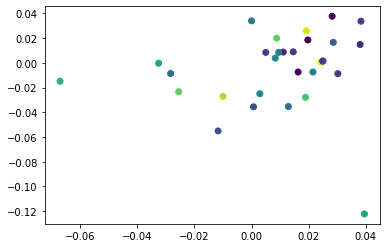

In [53]:
import matplotlib.pyplot as plt
plt.scatter(returnsant.iloc[0:30,0],returnsant.iloc[0:30,14],c=k.predict(returnsant.values)[0:30])

In [58]:
!pip install sktime

     |████████████████████████████████| 6.9 MB 68 kB/s eta 0:00:012
     |████████████████████████████████| 17.7 MB 113 kB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 54 kB/s eta 0:00:011
     |████████████████████████████████| 25.5 MB 69 kB/s eta 0:00:011
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.


In [62]:
from sktime.clustering.k_means import TimeSeriesKMeans
k_means = TimeSeriesKMeans(n_clusters=18, init_algorithm="forgy", metric="dtw")
k_means.fit_predict(returnsant.values)

array([13, 12,  9, 15,  7,  1,  1,  3,  1, 15, 12, 15,  9, 13,  3, 15,  1,
        7,  3,  3, 17,  1,  3,  1,  4, 16, 16,  1,  1, 17,  7, 13,  8,  8,
        7, 13,  9,  9,  7,  7,  7, 17, 13,  7,  1, 17, 17,  1,  7,  1, 13,
       13,  3,  3, 13, 15, 17,  1,  3,  7,  9, 15, 17, 15,  3,  3,  9,  7,
        9,  1, 17, 15,  7,  1,  9, 17,  7, 15,  9,  3,  1, 13,  3,  7, 15,
        9,  9, 17,  7,  3,  1,  7, 17, 15,  9,  9, 12,  1,  7,  7,  1,  7,
        7,  1,  3,  7, 17, 17, 17,  7,  1,  7,  9,  3,  9,  7,  3, 15,  9,
        3, 17, 13,  1,  7,  9,  1,  1, 12, 12,  1,  7, 13, 13, 15,  3,  9,
        9, 12,  9,  9, 17,  9, 17, 15, 15,  1,  1, 13,  9, 13, 13,  9,  7,
        7,  1, 13, 17,  9,  3, 15, 17, 17, 13,  9,  1,  7,  7,  3,  9,  9,
        8,  7,  9, 12,  9,  1,  9,  7,  7, 14, 16,  4,  7, 15, 17,  9,  9,
        1,  7,  9, 17, 17,  7, 13, 15])

In [65]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=18, random_state=0).fit(returnsant)
kmeans.labels_
kmeans.predict(returnsant)


array([10, 14,  7, 10, 12, 14,  9, 11, 10, 10, 10, 10, 10, 14,  8, 10, 10,
        8, 17, 12, 10, 10, 12, 14,  2,  6,  5, 11,  9, 12, 16, 16,  0, 13,
       12, 14,  8, 12, 15, 15, 15, 11, 11, 16, 10, 12, 10, 10,  8, 14, 10,
        8, 12, 12, 11, 12, 11, 10, 17, 14,  7, 10, 10, 10, 12, 12, 10, 12,
       12, 15, 12, 10, 15, 11, 17, 12, 12, 10,  9,  7, 11, 14, 10,  8,  9,
        9,  9,  9,  7, 17,  7,  8, 11, 10, 17,  7,  8, 10, 16, 16, 10, 11,
       12, 10, 17, 12,  9,  9, 10, 11, 10, 16, 17, 17,  9,  8, 12, 11, 10,
       12, 12, 14, 11,  8, 17, 14, 10, 14, 14, 16, 11, 14, 10, 10, 17, 17,
       10, 11, 10, 17, 11, 17, 17, 14, 15, 10, 10, 11, 12, 10, 14,  9, 16,
       11, 11, 11,  7,  8, 12, 14, 14, 12, 11, 17, 10, 16, 11, 12, 17,  8,
       13, 15, 17, 10, 17,  7, 17,  8, 15,  3,  4,  1, 16, 10, 14, 17, 17,
       10, 14, 10, 12, 16, 16, 14, 10], dtype=int32)

In [68]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=3, min_samples=2).fit_predict(returnsant)
DBSCAN(eps=3, min_samples=2)

DBSCAN(eps=3, min_samples=2)

In [69]:
clustering

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [71]:
returnsant['Factor - Value vs Growth'][179:186]

179   -12739.631010
180    10069.791610
181    31963.201490
182        0.062680
183       -0.001573
184        0.033124
185       -0.052004
Name: Factor - Value vs Growth, dtype: float64